In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as swt
from pandas_profiling import ProfileReport

In [147]:
raw_data = pd.read_csv('train.csv')

In [148]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
report_titanic = ProfileReport(raw_data, explorative=True)

In [6]:
report_titanic.to_widgets()

In [149]:
data = raw_data.copy()

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
data = data.drop(['Name', 'PassengerId', 'Cabin'], axis =1)

In [51]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [152]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [153]:
data = data.drop('Ticket', axis = 1)

In [154]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [155]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [156]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [157]:
# data['Embarked'] = data['Embarked'].fillna(data['Embarked'].median())
data['Embarked'] = data['Embarked'].fillna('S')

In [158]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [159]:
# def nans(df):
#     return df[df.isnull()['Embarked']]

In [160]:
# nans(data)

In [161]:
# data_embarked_drop = data.dropna(subset=['Embarked'])

In [162]:
data_embarked_drop['Embarked'].isnull().sum()

0

In [163]:
# data = data_embarked_drop.copy()

make a another model to predict the missing Ages prob a regresssion model

In [164]:
def nan1(df):
    return df[df.isnull()['Age']]

data preprocessing for the new task of sub regression model

In [165]:
dummies = pd.get_dummies(data, columns=['Embarked', 'Sex'], drop_first = True)

In [166]:
data_sub_model_dummy = dummies.copy()

In [167]:
data_sub_model_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [168]:
#get the nan data frame from the age
def nan1(df):
    return df[df.isnull()['Age']]

In [169]:
#age test data which is null
data_age_test = nan1(data_sub_model_dummy)

In [170]:
data_age_test

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
5,0,3,NaN,0,0,8.4583,1,0,1
17,1,2,NaN,0,0,13.0000,0,1,1
19,1,3,NaN,0,0,7.2250,0,0,0
26,0,3,NaN,0,0,7.2250,0,0,1
28,1,3,NaN,0,0,7.8792,1,0,0
...,...,...,...,...,...,...,...,...,...
859,0,3,NaN,0,0,7.2292,0,0,1
863,0,3,NaN,8,2,69.5500,0,1,0
868,0,3,NaN,0,0,9.5000,0,1,1
878,0,3,NaN,0,0,7.8958,0,1,1


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [172]:
#Age train data which is droped null
data_age_train = data_sub_model_dummy.dropna()

In [173]:
data_age_train.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train_age= data_age_train.drop('Age', axis = 1).values
X_test_age = data_age_test.drop('Age', axis = 1).values
y_train_age = data_age_train['Age'].values
# y_test = data_age_test['Age'].values

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
model_sub = LinearRegression()

In [178]:
model_sub.fit(X_train_age, y_train_age)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
preds = model_sub.predict(X_test_age)

In [180]:
preds

array([31.66045169, 30.46236177, 20.79414992, 27.33486571, 25.12677417,
       29.08508434, 31.45197558, 25.12834444, 20.56532756, 27.32671294,
       29.08321023, 27.50806727, 25.12834444, 19.02559024, 38.39770122,
       43.50336376, 15.57432726, 29.08508434, 29.08321023, 25.12788868,
       29.08321023, 29.08321023, 29.08508434, 22.31706542, 20.86222112,
       29.08321023, 31.66906023, 15.71665468, 25.81261956, 29.09217365,
       29.07576602, -5.85219078, 37.56270632, 45.28356096, 15.84436099,
       -5.62341946, 35.44856217, 44.99095823, 20.96735149, 31.66906023,
       25.12834444, -5.85219078, 27.60225922, 29.08508434, 16.07313231,
       29.31805845, 23.40897377, 20.96735149, 29.09293327, 36.3369801 ,
       31.66906023, 31.89783155, 45.22188043, 25.12834444, 37.38984826,
       45.28264942, 43.50336376, 38.45847022, 25.12834444, 16.57758722,
       33.28123692, 29.08321023, 35.95190762, -5.85219078, 16.80635854,
       33.36677611, 29.08508434, 18.37785535, 45.17326523, 27.33

In [181]:
predicted_age = preds.round()

In [182]:
data_age_test = data_age_test.drop('Age', axis=1)

In [183]:
data_age_test['Age'] = predicted_age

In [184]:
data_age_test.loc[data_age_test['Age'] < 0]

,Survived,Pclass,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Age
159,0,3,8,2,69.55,0,1,1,-6.0
180,0,3,8,2,69.55,0,1,0,-6.0
201,0,3,8,2,69.55,0,1,1,-6.0
324,0,3,8,2,69.55,0,1,1,-6.0
792,0,3,8,2,69.55,0,1,0,-6.0
846,0,3,8,2,69.55,0,1,1,-6.0
863,0,3,8,2,69.55,0,1,0,-6.0


In [185]:
# data_age_train.loc[(data_age_train['Pclass']==3) & (data_age_train['SibSp']==8) & (data_age_train['Parch'] ==2) & (data_age_train['Embarked_S']==1) & (data_age_train['Fare']==69.55)]
data_age_train.loc[data_age_train['Fare']==69.55]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male


In [186]:
# predcted_age_df = pd.DataFrame(predicted_age)

In [187]:
# predcted_age_df

In [188]:
# data_age_test = data_age_test.drop('Age', axis=1)

In [189]:
# data_age_test_df = data_age_test_df.append(predcted_age_df, ignore_index=True)
# data_dummy_no_null = pd.concat([data_age_test, data_age_train], axis =1)ssss
# data_dummy_no_null1 = pd.concat([data_age_test, data_age_train],join='outer', axis =1)
# data_merged_left = pd.merge(left=data_age_test, right=data_age_train, how='left', left_on='', right_on='species_id')
data_about_to_perfect = data_sub_model_dummy.copy()

In [190]:
data_about_to_perfect['Age'] = data_about_to_perfect['Age'].fillna(data_age_test['Age'])

In [191]:
data_about_to_perfect

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,1
887,1,1,19.0,0,0,30.0000,0,1,0
888,0,3,23.0,1,2,23.4500,0,1,0
889,1,1,26.0,0,0,30.0000,0,0,1


In [192]:
data_age_test

,Survived,Pclass,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Age
5,0,3,0,0,8.4583,1,0,1,32.0
17,1,2,0,0,13.0000,0,1,1,30.0
19,1,3,0,0,7.2250,0,0,0,21.0
26,0,3,0,0,7.2250,0,0,1,27.0
28,1,3,0,0,7.8792,1,0,0,25.0
...,...,...,...,...,...,...,...,...,...
859,0,3,0,0,7.2292,0,0,1,27.0
863,0,3,8,2,69.5500,0,1,0,-6.0
868,0,3,0,0,9.5000,0,1,1,29.0
878,0,3,0,0,7.8958,0,1,1,29.0


In [193]:
data_dummy_no_null = data_about_to_perfect.copy()

In [194]:
data = data_dummy_no_null.copy()

In [195]:
data.loc[[859,863,868,878,888,5,17,28,19]]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
859,0,3,27.0,0,0,7.2292,0,0,1
863,0,3,-6.0,8,2,69.5500,0,1,0
868,0,3,29.0,0,0,9.5000,0,1,1
878,0,3,29.0,0,0,7.8958,0,1,1
888,0,3,23.0,1,2,23.4500,0,1,0
5,0,3,32.0,0,0,8.4583,1,0,1
17,1,2,30.0,0,0,13.0000,0,1,1
28,1,3,25.0,0,0,7.8792,1,0,0
19,1,3,21.0,0,0,7.2250,0,0,0


In [196]:
data['Age'].mean()

29.384029180695844

In [197]:
data_age_neg_removed = data.copy()

In [198]:
data_age_neg_removed['Age'] = data_age_neg_removed['Age'].replace(-6,29)

In [199]:
data_age_neg_removed

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,1
887,1,1,19.0,0,0,30.0000,0,1,0
888,0,3,23.0,1,2,23.4500,0,1,0
889,1,1,26.0,0,0,30.0000,0,0,1


In [200]:
data_age_neg_removed.loc[863]

Survived       0.00
Pclass         3.00
Age           29.00
SibSp          8.00
Parch          2.00
Fare          69.55
Embarked_Q     0.00
Embarked_S     1.00
Sex_male       0.00
Name: 863, dtype: float64

In [201]:
data_final_processed = data_age_neg_removed.copy()

In [202]:
dummy_class = pd.get_dummies(data_final_processed, columns=['Pclass'], drop_first=True)

In [203]:
dummy_class

,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,1,1,0
887,1,19.0,0,0,30.0000,0,1,0,0,0
888,0,23.0,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0


In [204]:
data_all_done = dummy_class.copy()

# scaling

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
scaler = StandardScaler()

In [207]:
data_all_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked_Q  891 non-null    uint8  
 6   Embarked_S  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [208]:
to_scale = data_all_done[['Age','SibSp', 'Parch','Fare']]

In [209]:
scaled = scaler.fit_transform(to_scale)

In [210]:
scaled

array([[-0.57407243,  0.43279337, -0.47367361, -0.50244517],
       [ 0.62519086,  0.43279337, -0.47367361,  0.78684529],
       [-0.27425661, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [-0.49911848,  0.43279337,  2.00893337, -0.17626324],
       [-0.27425661, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.17546713, -0.4745452 , -0.47367361, -0.49237783]])

In [211]:
scaled_df = pd.DataFrame(scaled)

In [212]:
scaled_df.head()

,0,1,2,3
0,-0.574072,0.432793,-0.473674,-0.502445
1,0.625191,0.432793,-0.473674,0.786845
2,-0.274257,-0.474545,-0.473674,-0.488854
3,0.400329,0.432793,-0.473674,0.420730
4,0.400329,-0.474545,-0.473674,-0.486337


In [213]:
data_all_done_remove_to_scale= data_all_done.drop(['Age','SibSp', 'Parch','Fare'], axis=1)

In [214]:
data_all_done_scaled_dummy = pd.concat([data_all_done_remove_to_scale, scaled_df], axis=1)

In [215]:
data_all_done_scaled_dummy

,Survived,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3,0,1,2,3
0,0,0,1,1,0,1,-0.574072,0.432793,-0.473674,-0.502445
1,1,0,0,0,0,0,0.625191,0.432793,-0.473674,0.786845
2,1,0,1,0,0,1,-0.274257,-0.474545,-0.473674,-0.488854
3,1,0,1,0,0,0,0.400329,0.432793,-0.473674,0.420730
4,0,0,1,1,0,1,0.400329,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,1,1,0,-0.199303,-0.474545,-0.473674,-0.386671
887,1,0,1,0,0,0,-0.798934,-0.474545,-0.473674,-0.044381
888,0,0,1,0,0,1,-0.499118,0.432793,2.008933,-0.176263
889,1,0,0,1,0,0,-0.274257,-0.474545,-0.473674,-0.044381


# split data train test

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X = data_all_done_scaled_dummy.drop('Survived', axis=1)
y = data_all_done_scaled_dummy['Survived']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# decision tree


In [233]:
from sklearn.tree import DecisionTreeClassifier

In [234]:
model_tree = DecisionTreeClassifier()

In [235]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [236]:
preds_tree = model_tree.predict(X_test)

In [237]:
from sklearn.metrics import confusion_matrix, classification_report

In [298]:
score_tree_final = cross_val_score(model_tree, X, y.ravel(), cv = 10)
print('final score array: ',score_tree_final)
print('\n')
print('final score mean:',score_tree_final.mean())

final score array:  [0.75555556 0.83146067 0.7752809  0.7752809  0.83146067 0.83146067
 0.78651685 0.78651685 0.80898876 0.83146067]


final score mean: 0.8013982521847691


In [242]:
print(confusion_matrix(preds_tree, y_test))
print('\n\n')
print(classification_report(preds_tree, y_test))

[[129  39]
 [ 25  75]]



              precision    recall  f1-score   support

           0       0.84      0.77      0.80       168
           1       0.66      0.75      0.70       100

    accuracy                           0.76       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.77      0.76      0.76       268



# random forest

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [244]:
model_forest = RandomForestClassifier()

In [245]:
model_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [246]:
preds_forest = model_forest.predict(X_test)

In [297]:
score_forest_final = cross_val_score(model_forest, X, y.ravel(), cv = 10)
print('final score array: ',score_forest_final)
print('\n')
print('final score mean:',score_forest_final.mean())

final score array:  [0.8        0.82022472 0.7752809  0.85393258 0.87640449 0.82022472
 0.83146067 0.82022472 0.85393258 0.86516854]


final score mean: 0.8316853932584269


In [247]:
print(confusion_matrix(preds_forest, y_test))
print('\n\n')
print(classification_report(preds_forest, y_test))

[[137  30]
 [ 17  84]]



              precision    recall  f1-score   support

           0       0.89      0.82      0.85       167
           1       0.74      0.83      0.78       101

    accuracy                           0.82       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.83      0.82      0.83       268



# k nearest neighbor

In [248]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
model_knn = KNeighborsClassifier()

In [256]:
error_rate = []
for i in range(1,10):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    preds_i = model_knn.predict(X_test)
    error_rate.append(np.mean(preds_i !=y_test))

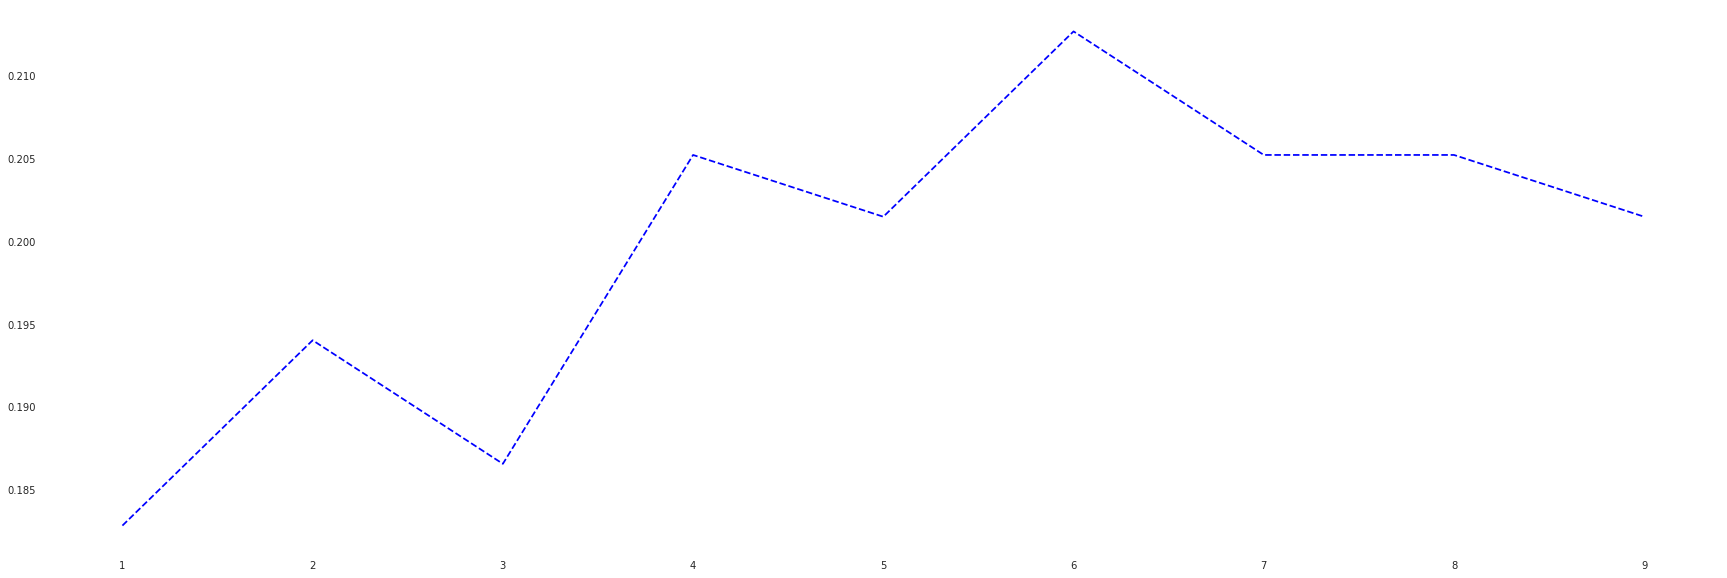

In [258]:
plt.figure(figsize=(30,10))
plt.plot(range(1,10), error_rate, color = 'blue', linestyle = '--', markerfacecolor ='red',markersize=10)

In [267]:
model_knn_final = KNeighborsClassifier(n_neighbors=1)
model_knn_final.fit(X_train, y_train)
preds_knn_final= model_knn_final.predict(X_test)

In [295]:
score_knn_final = cross_val_score(model_knn_final, X, y.ravel(), cv = 10)
print('final score array: ',score_knn_final)
print('\n')
print('final score mean:',score_knn_final.mean())

final score array:  [0.7        0.71910112 0.71910112 0.85393258 0.78651685 0.78651685
 0.76404494 0.75280899 0.78651685 0.79775281]


final score mean: 0.766629213483146


In [268]:
print(confusion_matrix(preds_knn_final, y_test))
print('\n\n')
print(classification_report(preds_knn_final, y_test))

[[134  29]
 [ 20  85]]



              precision    recall  f1-score   support

           0       0.87      0.82      0.85       163
           1       0.75      0.81      0.78       105

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.82      0.82      0.82       268



# XG boost

In [269]:
params = {
"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [270]:
from sklearn.model_selection import RandomizedSearchCV

In [272]:
pip install xgboost

     |████████████████████████████████| 127.6 MB 12 kB/s  eta 0:00:01    |██████▉                         | 27.2 MB 2.0 MB/s eta 0:00:50��███████████████████▎   | 112.9 MB 1.6 MB/s eta 0:00:10
Note: you may need to restart the kernel to use updated packages.


In [273]:
import xgboost as xgb

In [274]:
xgb_classifier = xgb.XGBClassifier()

In [275]:
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, n_iter =5, scoring = 'roc_auc', n_jobs =1, cv =5, verbose=2)

In [276]:
random_search.fit(X, y.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, total=   0.3s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, total=   0.0s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, total=   0.1s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, total=   0.1s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5,

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.

In [277]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [280]:
model_xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [281]:
from sklearn.model_selection import cross_val_score

In [283]:
score_xgb = cross_val_score(model_xgb, X, y.ravel(), cv = 10)

In [284]:
score_xgb

array([0.8       , 0.80898876, 0.78651685, 0.88764045, 0.86516854,
       0.8988764 , 0.85393258, 0.79775281, 0.8988764 , 0.83146067])

In [285]:
score_xgb.mean()

0.8429213483146067

In [287]:
model_xgb.fit(X_train,y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [288]:
preds_xgb = model_xgb.predict(X_test)

In [296]:
score_xgb_final = cross_val_score(model_xgb, X, y.ravel(), cv = 10)
print('final score array: ',score_xgb_final)
print('\n')
print('final score mean:',score_xgb_final.mean())

final score array:  [0.8        0.80898876 0.78651685 0.88764045 0.86516854 0.8988764
 0.85393258 0.79775281 0.8988764  0.83146067]


final score mean: 0.8429213483146067


In [299]:
print(confusion_matrix(preds_xgb, y_test))
print('\n\n')
print(classification_report(preds_xgb, y_test))

[[142  32]
 [ 12  82]]



              precision    recall  f1-score   support

           0       0.92      0.82      0.87       174
           1       0.72      0.87      0.79        94

    accuracy                           0.84       268
   macro avg       0.82      0.84      0.83       268
weighted avg       0.85      0.84      0.84       268

